In [1]:
!pip install --upgrade pip
!pip install --no-build-isolation --force-reinstall numpy
!pip install --no-build-isolation --force-reinstall scikit-learn
!pip install pandas gensim matplotlib nltk


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/12.9 MB 10.6 MB/s eta 0:00:01
   ------------------- -------------------- 6.3/12.9 MB 12.1 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 14.2 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ---------------------------

In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
corpus = [
    "Deep learning improves AI performance.",
    "Neural networks are a key part of deep learning.",
    "Word embeddings capture semantic meaning.",
    "TF-IDF is useful for text processing.",
    "Word2Vec generates word embeddings."
]

# Очистим текст и разобьём на слова
tokenized_corpus = [[word for word in simple_preprocess(text) if word not in stop_words] for text in corpus]


In [4]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF матрица:")
display(tfidf_df)


TF-IDF матрица:


,ai,are,capture,deep,embeddings,for,generates,idf,improves,is,...,of,part,performance,processing,semantic,text,tf,useful,word,word2vec
0,0.48214,0.00000,0.00000,0.388988,0.000000,0.000000,0.000000,0.000000,0.48214,0.000000,...,0.00000,0.00000,0.48214,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.37007,0.00000,0.298570,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.37007,0.37007,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.48214,0.000000,0.388988,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.48214,0.000000,0.000000,0.000000,0.388988,0.000000
3,0.00000,0.00000,0.00000,0.000000,0.000000,0.377964,0.000000,0.377964,0.00000,0.377964,...,0.00000,0.00000,0.00000,0.377964,0.00000,0.377964,0.377964,0.377964,0.000000,0.000000
4,0.00000,0.00000,0.00000,0.000000,0.444002,0.000000,0.550329,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.444002,0.550329


In [5]:
# Обучаем Word2Vec модель
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=10, window=2, min_count=1, workers=4)

# Получаем вектор для слова "word"
word_vector = word2vec_model.wv["word"]
print("Вектор слова 'word':", word_vector)


Вектор слова 'word': [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]


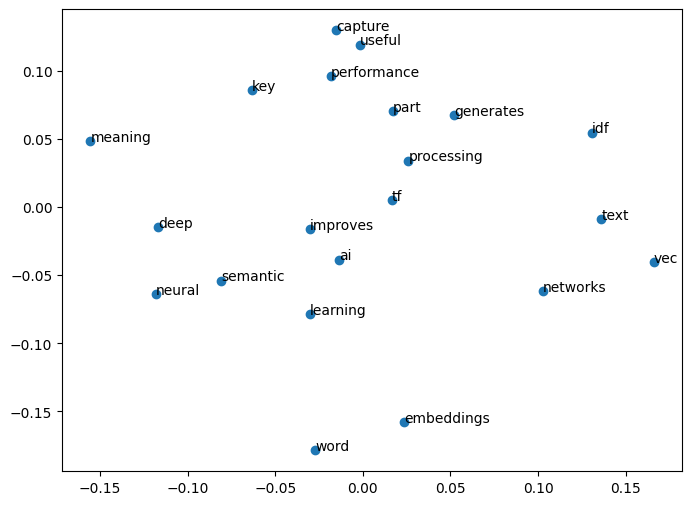

In [6]:
from sklearn.decomposition import PCA

# Преобразуем векторы слов в 2D для визуализации
words = list(word2vec_model.wv.index_to_key)
vectors = [word2vec_model.wv[word] for word in words]

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

plt.show()
